In [ ]:
# OTTER IMPORT

# ECON 148 Lab #

In this lab, we'll learn how to use APIs or Application Programming Interfaces. APIs are super powerful tools that allow different computer programs to interact with each other. In the context of data science, APIs are often used to access data from different sources.

<center><img src="data/675px-Rest-API.png"/></center>

<h><center>[Image Source](https://www.seobility.net/en/wiki/REST_API)</center><h>

Using APIs allows you to easily access data and reduces the amount of time it takes to refresh data with updates. In this notebook, we'll explore data from the US Energy Information Administration.

## Part 1: Get Your API Key

In most cases, you will need an API key in order to access an API. Some API keys involve paperwork or payment, but the EIA provides *free* API keys [here](https://www.eia.gov/opendata/register.php). Once you have submitted your information, you will recieve an confirmation email. Once you have confirmed, you will recieve your key.

**Question 1.1**: Request an EIA API Key and paste it below.

In [ ]:
my_api_key = "YOUR API KEY HERE"

In [8]:
my_api_key = os.environ["eia_key"]

In [ ]:
# THIS WILL BE AN OTTER CELL

## Part 2: Acessing the API

Let's first see how an API call works. In this notebook, we'll be using the `requests` library to access the EIA data. As part of this, we'll use the `get` method to pull the data. We'll also be utilizing an API key, which is a unique identifier, much like a password that allows you to access the data. 


Let's start by importing the necessary libraries.

In [2]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,8)

First, we'll create variable for the URL location of the data we want to pull. The EIA has a helpful [website](https://www.eia.gov/opendata/browser/) that allows you to select what types of data you would like to use and autogenerate a URL to use. In this example, we'll be looking at $CO_2$ or carbon dioxide emissions.

In [10]:
# The url that stores the EIA data
api_url = "https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/"

# The API key param and your API key
api_key = "?api_key="+my_api_key

# Selects just California and pulls data values
api_data_pull = "&facets[stateId][]=CA&data[]=value"

# Makes a GET request to pull the data
response = requests.get(api_url+api_key+api_data_pull)

# The response from the API in JSON form
r = response.json()

In [11]:
r["response"]["data"][0]

{'period': 1970,
 'sectorId': 'RC',
 'sector-name': 'Residential carbon dioxide emissions',
 'fuelId': 'CO',
 'fuel-name': 'Coal',
 'stateId': 'CA',
 'state-name': 'California',
 'value': 0.128968,
 'value-units': 'million metric tons of CO2'}

As you can see, the data from the API is not in the normal tabular/CSV format we are used to seeing. That is because the data is being help in a format called JSON or JavaScript Object Notation. This data structure uses a series of dictionaries to store data in key value pairs. To convert the JSON file into something that we can manipulate with `pandas`, we can use the `from_dict` method.

In [15]:
emissions = pd.DataFrame.from_dict(r["response"]["data"])

In [16]:
emissions.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,1970,RC,Residential carbon dioxide emissions,CO,Coal,CA,California,0.128968,million metric tons of CO2
1,1970,RC,Residential carbon dioxide emissions,PE,Petroleum,CA,California,1.375131,million metric tons of CO2
2,1970,RC,Residential carbon dioxide emissions,NG,Natural Gas,CA,California,30.877841,million metric tons of CO2
3,1970,RC,Residential carbon dioxide emissions,TO,All Fuels,CA,California,32.381940,million metric tons of CO2
4,1970,CC,Commercial carbon dioxide emissions,CO,Coal,CA,California,0.101312,million metric tons of CO2


Now that we have the data, let's explore it. Let's start by looking at carbon dioxide emisssion in California over time.

We can start by selecting `Total carbon dioxide emissions from all sectors` and `All Fuels`

In [17]:
ca_all_emissions_all_fuels=emissions[(emissions["sectorId"]=="TT")&
                                     (emissions["fuel-name"]=="All Fuels")].sort_values("period")

In [18]:
ca_all_emissions_all_fuels.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
20,1970,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,294.366786,million metric tons of CO2
44,1971,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,305.827812,million metric tons of CO2
68,1972,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,312.715431,million metric tons of CO2
92,1973,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,329.277423,million metric tons of CO2
116,1974,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,304.462225,million metric tons of CO2


Now let's plot these values over time. The `plt.plot` method plots a line plot using the first parameter as the x-axis and the second parameter as the y-axis. Labels are added using `plt.xlabel()` and `plt.ylabel()` for each axis. Finally, a title is added with the `plt.title()` method.

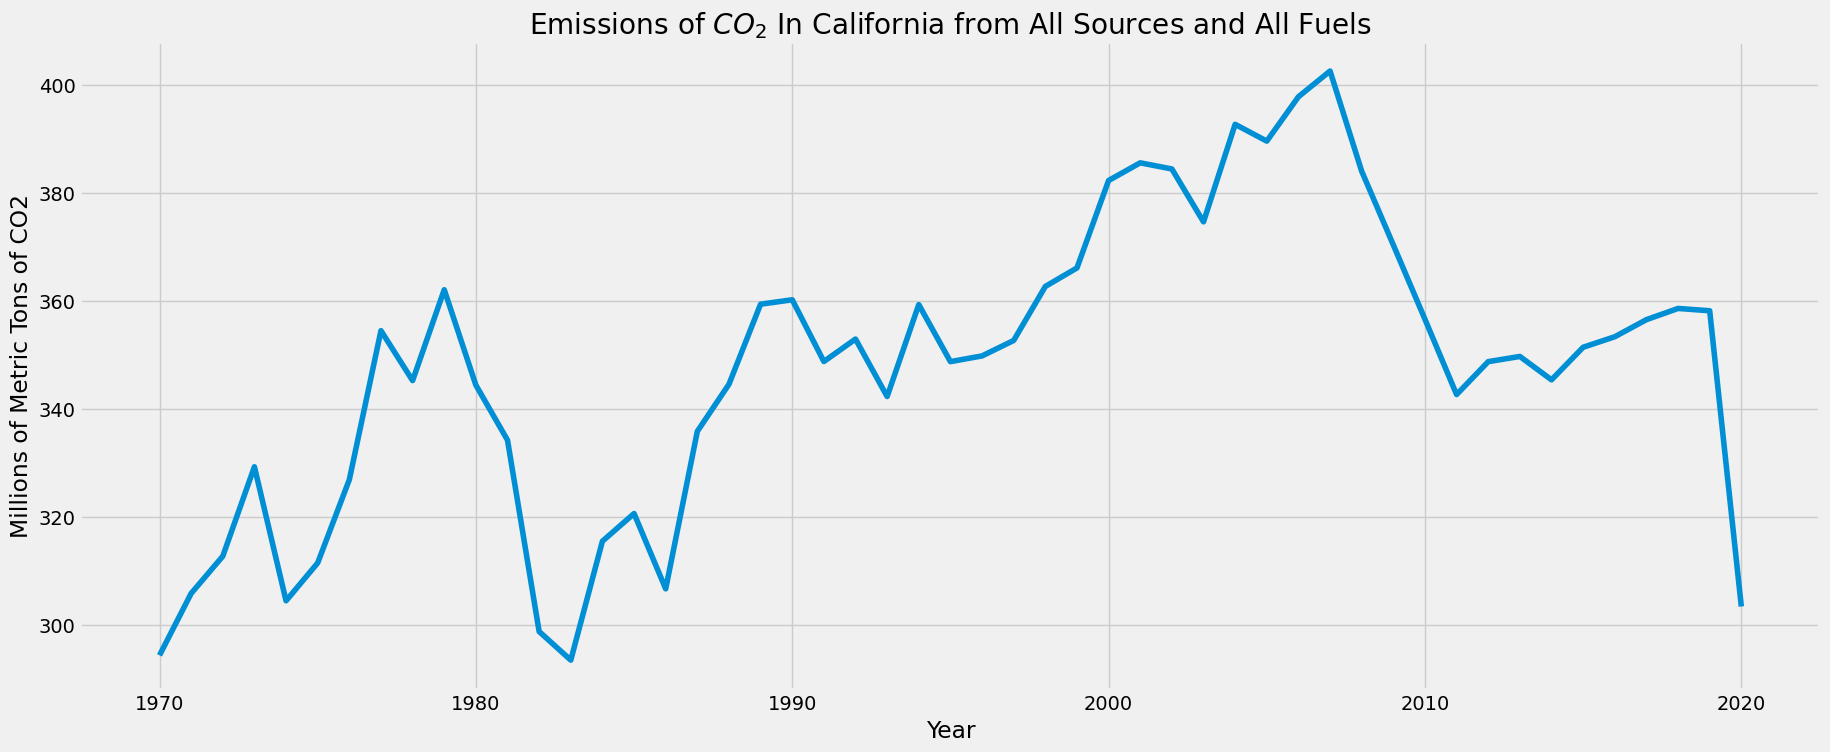

In [19]:
plt.plot(ca_all_emissions_all_fuels["period"],ca_all_emissions_all_fuels["value"])
plt.xlabel("Year")
plt.ylabel("Millions of Metric Tons of CO2")
plt.title("Emissions of $CO_2$ In California from All Sources and All Fuels");

**Question 2.1**: Create a dataframe called `ca_all_emissions_coal` and select data that has `sectorId == "TT"` and `fuel-name == "Coal"`.

*Hint: Look at the previous example if you need a guide.*

In [20]:
ca_all_emissions_coal=emissions[(emissions["sectorId"]=="TT")&
                                     (emissions["fuel-name"]=="Coal")].sort_values("period")

In [21]:
ca_all_emissions_coal.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
21,1970,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,5.637264,million metric tons of CO2
45,1971,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,4.643243,million metric tons of CO2
69,1972,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,4.318793,million metric tons of CO2
93,1973,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,6.093156,million metric tons of CO2
117,1974,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,5.528723,million metric tons of CO2


In [22]:
# OTTER CELL

**Question 2.2**: Create a line plot using `plt.plot()` with `period` on the x-axis and `value` on the y-axis using the `ca_all_emissions_coal` dataframe. Add in an x-axis label of `Year` and y-axis label of `Millions of Metric Tons of CO2`. Add an appropriate title.

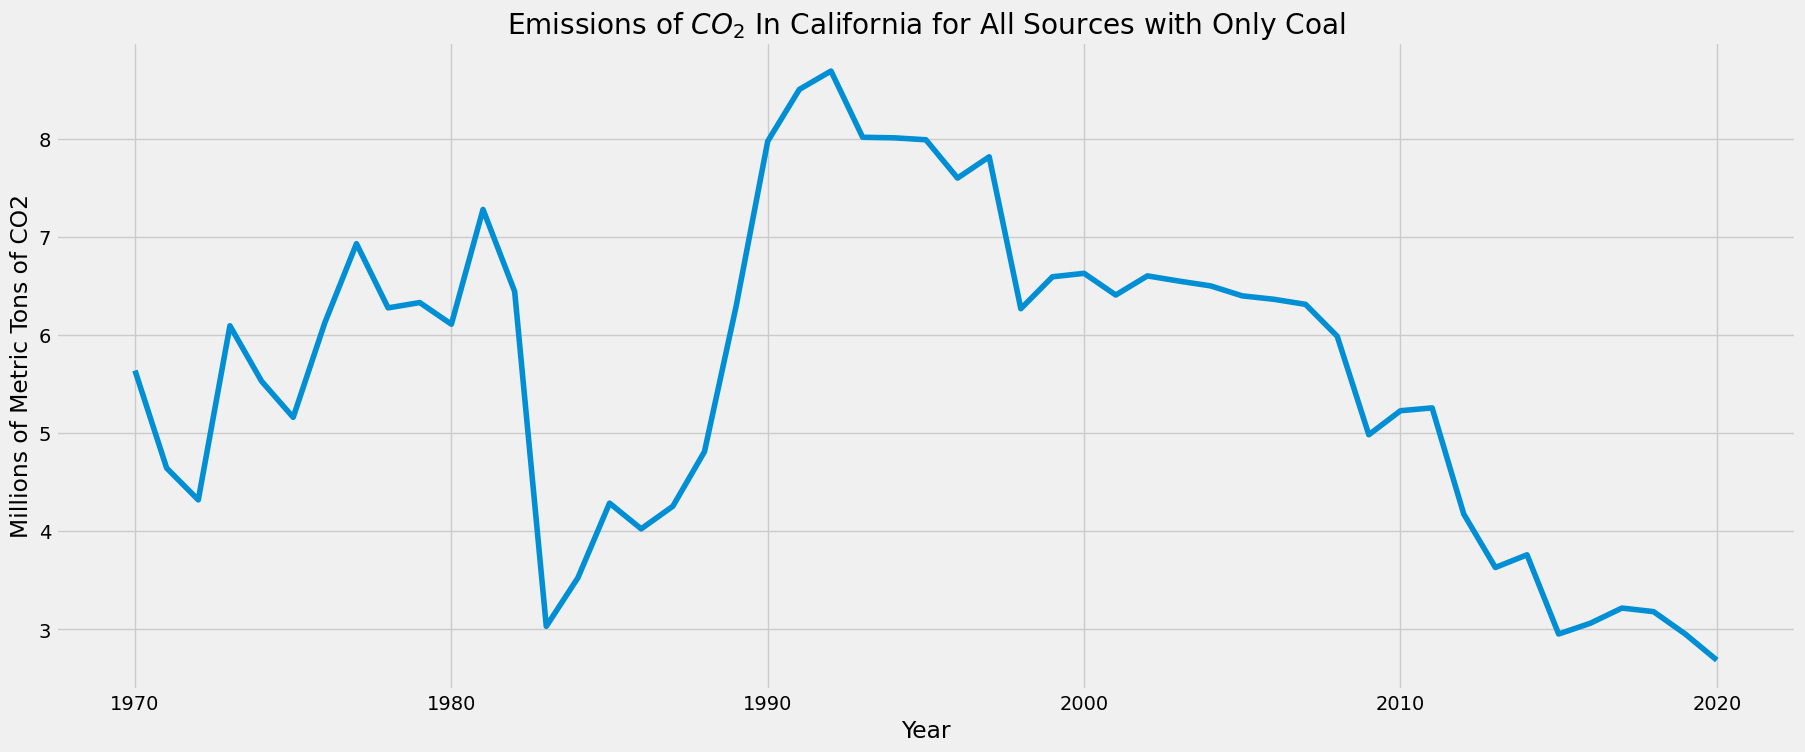

In [26]:
plt.plot(ca_all_emissions_coal["period"], ca_all_emissions_coal["value"])
plt.xlabel("Year")
plt.ylabel("Millions of Metric Tons of CO2")
plt.title("Emissions of $CO_2$ In California for All Sources with Only Coal");

## Part 3: Renewable Energy

Now that we have done some work with the API, let's look at a different data set: renewable energy in California.

**Question 3.1**: Go to the [EIA API Browser](https://www.eia.gov/opendata/browser/) and select "Short Term Energy Outlook" in the "Select Route" dropdown. Then hit the submit button. An API URL should appear below. Copy and paste it into the variable `renewables_api_url` below.

In [ ]:
renewables_api_url = "API URL FROM EIA WEBSITE HERE"

In [32]:
renewables_api_url="https://api.eia.gov/v2/steo/data/"

In [ ]:
# OTTER CELL

Now we'll be selecting just the data we are interested in. `RTEPGEN_CA` is electricity generated from all types of renewable sources in California.

In [27]:
# Selects just California and pulls data values
renewable_api_data_pull = "&facets[seriesId][]=RTEPGEN_CA&data[]=value"

# Makes a GET request to pull the data
response_renewable = requests.get(renewables_api_url+api_key+renewable_api_data_pull)

# The response from the API in JSON form
renewable_json = response_renewable.json()

In [43]:
renewables=pd.DataFrame.from_dict(renewable_json["response"]["data"])
renewables["period"]=pd.to_datetime(renewables["period"])
renewables.head()

,period,seriesId,seriesDescription,value,unit
0,2010-01-01,SOEPGEN_CA,Electric power sector net generation from util...,0.002451,billion kilowatthours
1,2010-02-01,SOEPGEN_CA,Electric power sector net generation from util...,0.020931,billion kilowatthours
2,2010-03-01,SOEPGEN_CA,Electric power sector net generation from util...,0.051916,billion kilowatthours
3,2010-04-01,SOEPGEN_CA,Electric power sector net generation from util...,0.076926,billion kilowatthours
4,2010-05-01,SOEPGEN_CA,Electric power sector net generation from util...,0.108241,billion kilowatthours


**Question 3.2**: Recreate the following visualization in the cell below. Your visualization should:
* Use the `renewables` dataframe
* Plot `period` on the x-axis and `value` on the y-axis
* Have a title of `Electric Power Generation from Renewable Sources`
* Have x-axis label of `Year`
* Have y-axis label of `Billion Kilowatthours`

<center><img src="data/q3.2.png"/></center>

In [ ]:
# YOUR CODE HERE

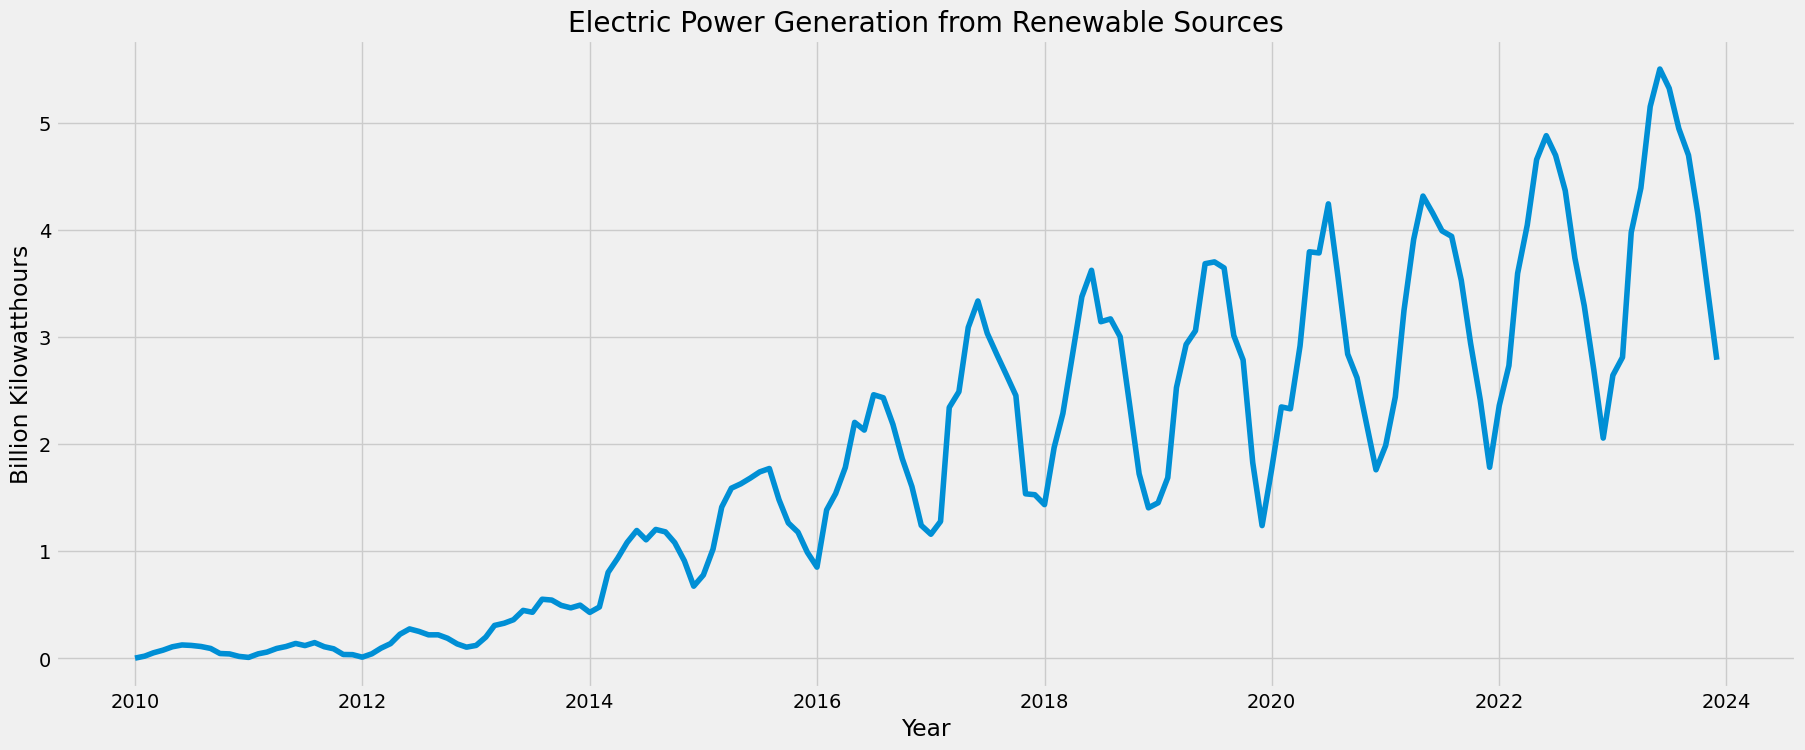

In [44]:
plt.plot(renewables["period"],renewables["value"])
plt.title("Electric Power Generation from Renewable Sources")
plt.xlabel("Year")
plt.ylabel("Billion Kilowatthours");

In [ ]:
# OTTER CELL